# Récupérer les métadonnées des vidéos Matignon-LSF

In [1]:
from pytube import YouTube

In [2]:
import re
import csv

In [3]:
from pytube.exceptions import VideoUnavailable

In [4]:
def convert_seconds_to_time(total_seconds):
    # Calcul des heures, minutes et secondes
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60

    # Formatage du résultat
    time_str = f"{hours}:{minutes}:{seconds}"

    return time_str


In [5]:
month = ["janvier","fevrier","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"]
months_regex = '|'.join(month)

In [6]:
list_video = []
with open("list_id_video.txt","r",encoding="utf-8") as f:
    for line in f:
        list_video.append(line.strip())


In [7]:
with open("metada_Matignon-LSF.csv","w",encoding="utf-8",newline='') as file:
    fieldnames = ["id","name","subtitle","audio","title","date","duration","fps","res"]
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    list_dict = []
    dict_data = {}
    for video_id in list_video:
        dict_data = {'id': video_id, "name": f"{video_id}_clip_cropped.mp4", "subtitle": f"{video_id}.json",
                        "audio": f"{video_id}_audio.mp3"}

        try:
            yt = YouTube(f"http://youtube.com/watch?v={video_id}")
            title = yt.title
            dict_data["title"] = title

            # Initialize fps and res to N/A in case no suitable stream is found
            dict_data["fps"] = "N/A"
            dict_data["res"] = "N/A"

            for stream in yt.streams:
                if stream.resolution and stream.fps:
                    dict_data["fps"] = stream.fps
                    dict_data["res"] = stream.resolution
                    break  # Exit loop once a suitable stream is found

            dict_data["duration"] = yt.length/60

            date_match = re.search(r'(\d{1,2}(er)? [a-zA-Zéû]+ \d{4})', title)
            if date_match:
                date_str = date_match.group(1)
                dict_data["date"] = date_str
            else:
                dict_data["date"] = "unknown"

        except VideoUnavailable:
            # Handle VideoUnavailable exception
            dict_data["title"] = "video indisponible"
            dict_data["date"] = "N/A"
            dict_data["duration"] = "N/A"

        except Exception as e:
            # Handle other exceptions
            print(f"Une erreur s'est produite lors du traitement de la vidéo avec l'ID {video_id}: {str(e)}")
            dict_data["title"] = "N/A"
            dict_data["date"] = "N/A"
            dict_data["duration"] = "N/A"

        list_dict.append(dict_data)

    for row in list_dict:
        writer.writerow(row)

In [8]:
length_total = 0
liste_length = []
total_row = 0
with open("metada_Matignon-LSF.csv", "r", encoding="utf-8") as f:
    for row in f:
        valeur = row.strip().split(",")
        id, _, _, _, _,_, length, _, _ = valeur
        if length !="N/A" and length !="duration":
            length_total += float(length)
            liste_length.append(float(length))
            total_row +=1
        else:
            print(id)

print("Total Length:", length_total, total_row, length_total/total_row)


id
Total Length: 2411.3499999999995 66 36.53560606060605


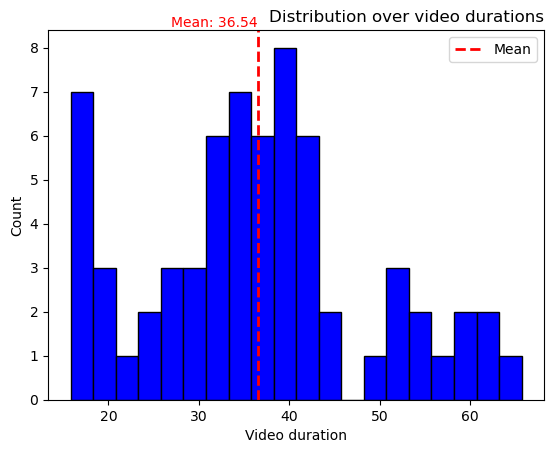

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que vous avez une liste de durées de vidéos en minutes
durees_videos = liste_length

# Créer un histogramme
plt.hist(durees_videos, bins=20, color='blue', edgecolor='black')

# Calculer la valeur moyenne
moyenne = np.mean(durees_videos)

# Ajouter une ligne verticale pour représenter la valeur moyenne
plt.axvline(moyenne, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Ajouter la valeur moyenne en tant que texte
plt.text(moyenne, plt.ylim()[1], f'Mean: {moyenne:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')

# Ajouter des labels et un titre
plt.xlabel('Video duration')
plt.ylabel('Count')
plt.title('Distribution over video durations', loc="right")

# Ajouter une légende
plt.legend()


plt.savefig("distribution_over_video_durations.png")
# Afficher la figure
plt.show()

In [55]:
def lister_fichiers_with_path(dossier):
    path = dossier
    try:
        # Liste de tous les fichiers dans le dossier
        fichiers = [os.path.join(path,f) for f in os.listdir(dossier) if os.path.isfile(os.path.join(dossier, f))]
        return fichiers
    except Exception as e:
        print(f"Erreur lors de la récupération des fichiers : {e}")
        return None
    

def lister_fichiers(dossier):
    path = dossier
    try:
        # Liste de tous les fichiers dans le dossier
        fichiers = [f for f in os.listdir(dossier) if os.path.isfile(os.path.join(dossier, f))]
        return fichiers
    except Exception as e:
        print(f"Erreur lors de la récupération des fichiers : {e}")
        return None

In [57]:
import os

In [58]:
files_path = lister_fichiers_with_path("../preprocess_subtitles/sentence_segmentation_subtitles/test_sent_file_cr/")
name_file = lister_fichiers("../preprocess_subtitles/sentence_segmentation_subtitles/test_sent_file_cr/")

In [67]:
count_sent = 0

for path,name in zip(files_path,name_file):
    print(name)
    with open(path,"r",encoding="utf-8") as f:
        count_sent = count_sent + len(f.readlines())
        print(count_sent)

8ZUIw7jcaZE.vtt
280
hegyfM0YipI.vtt
535
8IqhpOiPMxY.vtt
974
H448NJiwMRI.vtt
1156
jNouEg1YgKQ.vtt
1461
6fsIXStr6w4.vtt
1659
CDsP8gaVGbg.vtt
1979
rpcc3B2P31Q.vtt
2311
K7WqKupeGVk.vtt
2591
nK47Jj-GdTo.vtt
2879
YmXGfLxTvFQ.vtt
3358
F5-w4cvC_L0.vtt
3615
-LhfYZ1ihpI.vtt
3982
dGxmroECIlU.vtt
4235
jo4puWxt-Ik.vtt
4472
VZeIXQAt2C8.vtt
4750
aKGSwBZpRXw.vtt
4982
qVYiLFZojws.vtt
5276
j6bYWLKPuPs.vtt
5547
qUZ5TOoL1EE.vtt
5988
V-XRefvjCEU.vtt
6285
aTtX70EXGVo.vtt
6523
pyC6EXZ449c.vtt
6688
CxgdUjywiDE.vtt
6924
awTzYOLwLSc.vtt
7366
1MHphyCtLLE.vtt
7662
Y0AmWgJwbVg.vtt
7935
3TEX9ruhaXo.vtt
8164
1ILfD_BjLNk.vtt
8410
vlNNOM4i3Q0.vtt
8561
M5SVtrVMQm0.vtt
8700
wMDNQG0oA7k.vtt
9109
LicjiPStTmU.vtt
9342
zwr3T94t0ZE.vtt
9617
_Lx00No3bZc.vtt
9711
B62_uSapEhI.vtt
9962
1AjRdJ5d_Ww.vtt
10175
ub_iGqVn8EU.vtt
10509
Yw0atlzQbEs.vtt
10770
KhxgwQDJpCg.vtt
10929
RenNdZa3-QY.vtt
11154
X3SSQD7qsTw.vtt
11471
_PJ2xR9-o94.vtt
11630
G3Tz-srNvjs.vtt
11918
Sy7uU8DAsfs.vtt
12096
Vyl8jrHGA6k.vtt
12422
pDAM2zcA24U.vtt
12862
0hXvx

In [66]:
count_sent

0